In [1]:
import matplotlib.pyplot as plt

# 한글 폰트 경로 설정 (예: 나눔고딕)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

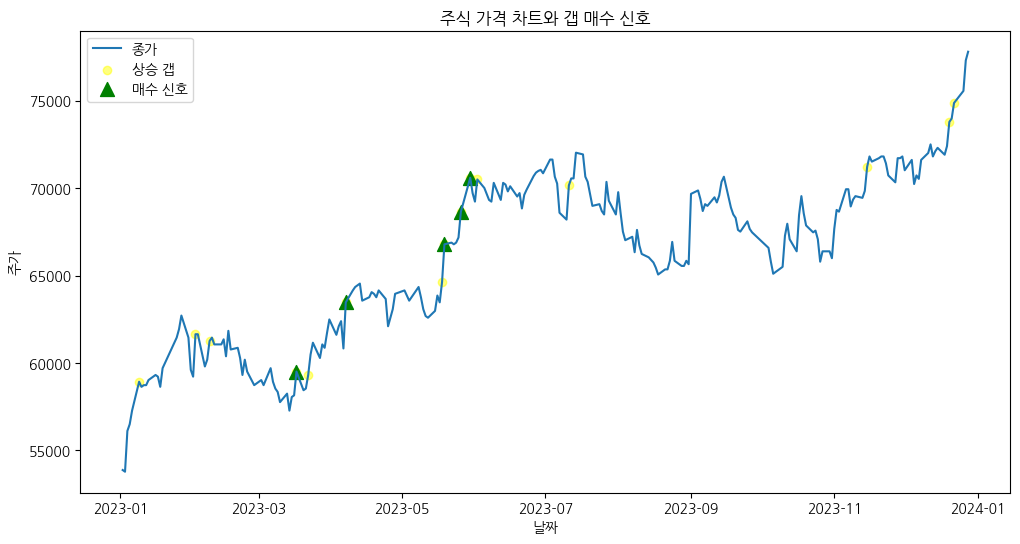

총 수익률: 0.96%
총 거래 횟수: 5
승률: 60.00%
최종 자본: 10,096,371원


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_stock_data(ticker, start_date, end_date):
    """
    야후 파이낸스에서 주식 데이터를 가져오는 함수
    :param ticker: 주식 티커 심볼
    :param start_date: 시작 날짜
    :param end_date: 종료 날짜
    :return: 주식 데이터 DataFrame
    """
    stock = yf.Ticker(ticker)
    df = stock.history(start=start_date, end=end_date)
    return df

def identify_gaps(df, gap_threshold=0.01):
    """
    상승 갭을 식별하는 함수
    :param df: 주식 데이터 DataFrame
    :param gap_threshold: 갭으로 간주할 최소 가격 차이 비율
    :return: 갭이 식별된 DataFrame
    """
    df['prev_close'] = df['Close'].shift(1)
    df['gap'] = (df['Open'] - df['prev_close']) / df['prev_close']
    df['gap_up'] = (df['gap'] > gap_threshold) & (df['Close'] > df['Open'])
    return df

def generate_buy_signals(df, volume_threshold=1.5):
    """
    매수 신호를 생성하는 함수
    :param df: 갭이 식별된 DataFrame
    :param volume_threshold: 평균 거래량 대비 최소 거래량 비율
    :return: 매수 신호가 추가된 DataFrame
    """
    df['avg_volume'] = df['Volume'].rolling(window=20).mean()
    df['volume_spike'] = df['Volume'] > (df['avg_volume'] * volume_threshold)
    df['buy_signal'] = df['gap_up'] & df['volume_spike']
    return df

def plot_stock_with_signals(df):
    """
    주식 차트와 매수 신호를 시각화하는 함수
    :param df: 분석된 주식 데이터 DataFrame
    """
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='종가')
    plt.scatter(df[df['gap_up']].index, df[df['gap_up']]['Close'], color='yellow', label='상승 갭', alpha=0.5)
    plt.scatter(df[df['buy_signal']].index, df[df['buy_signal']]['Close'], color='green', s=100, label='매수 신호', marker='^')
    
    plt.title('주식 가격 차트와 갭 매수 신호')
    plt.xlabel('날짜')
    plt.ylabel('주가')
    plt.legend()
    plt.show()

def backtest_strategy(df, initial_capital=10000000):
    """
    매수 전략을 백테스트하는 함수
    :param df: 매수 신호가 포함된 DataFrame
    :param initial_capital: 초기 자본
    :return: 백테스트 결과
    """
    df['position'] = df['buy_signal'].astype(int)
    df['position'] = df['position'].shift(1)
    df['returns'] = df['Close'].pct_change()
    df['strategy_returns'] = df['position'] * df['returns']
    
    df['cumulative_returns'] = (1 + df['returns']).cumprod()
    df['cumulative_strategy_returns'] = (1 + df['strategy_returns']).cumprod()
    
    total_trades = df['buy_signal'].sum()
    winning_trades = ((df['strategy_returns'] > 0) & (df['position'] == 1)).sum()
    
    return {
        'total_return': df['cumulative_strategy_returns'].iloc[-1] - 1,
        'total_trades': total_trades,
        'winning_ratio': winning_trades / total_trades if total_trades > 0 else 0,
        'final_capital': initial_capital * df['cumulative_strategy_returns'].iloc[-1]
    }

# 메인 실행 코드
if __name__ == "__main__":
    ticker = "005930.KS"  # 삼성전자 주식 코드
    start_date = "2023-01-01"
    end_date = "2024-01-01"
    
    df = get_stock_data(ticker, start_date, end_date)
    df = identify_gaps(df)
    df = generate_buy_signals(df)
    plot_stock_with_signals(df)
    
    backtest_results = backtest_strategy(df)
    
    print(f"총 수익률: {backtest_results['total_return']:.2%}")
    print(f"총 거래 횟수: {backtest_results['total_trades']}")
    print(f"승률: {backtest_results['winning_ratio']:.2%}")
    print(f"최종 자본: {backtest_results['final_capital']:,.0f}원")

D:\dev\stock\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\dev\stock\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\dev\stock\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52884 (\N{HANGUL SYLLABLE KAEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\dev\stock\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46308 (\N{HANGUL SYLLABLE DEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\dev\stock\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\dev\stock\.venv\L

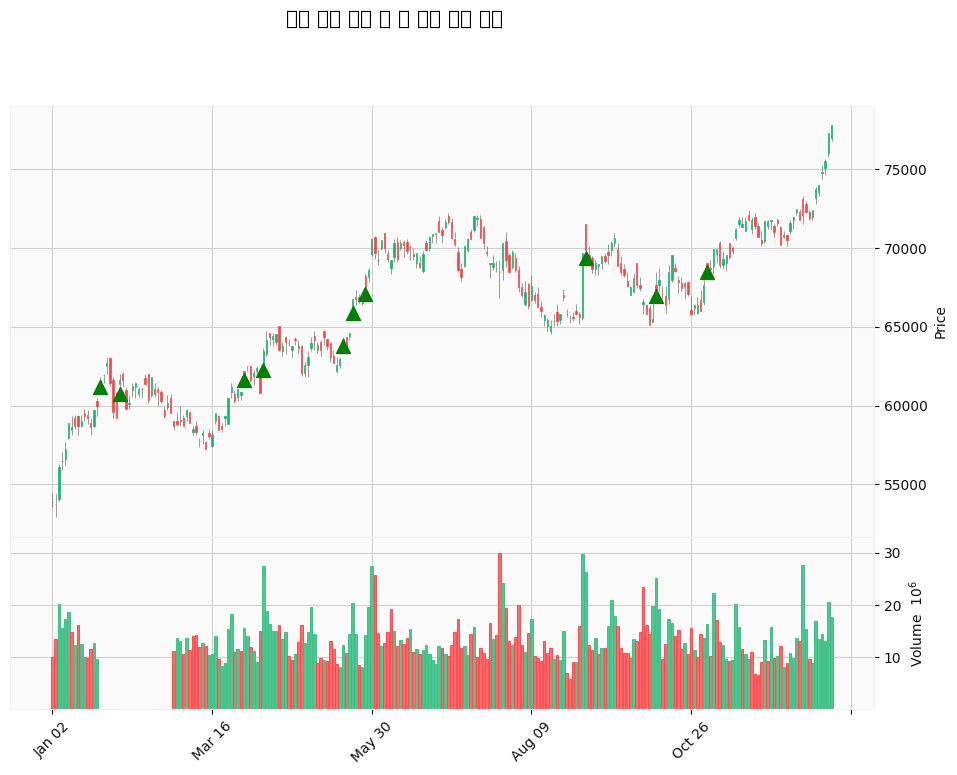

총 10 개의 매수 신호가 발생했습니다.
매수 신호 발생 날짜: 2023-01-25, 시가: 61643.27, 갭 크기: 2.75%
매수 신호 발생 날짜: 2023-02-02, 시가: 61352.05, 갭 크기: 3.61%
매수 신호 발생 날짜: 2023-03-30, 시가: 62195.52, 갭 크기: 2.18%
매수 신호 발생 날짜: 2023-04-07, 시가: 62293.16, 갭 크기: 2.41%
매수 신호 발생 날짜: 2023-05-16, 시가: 64245.92, 갭 크기: 2.02%
매수 신호 발생 날짜: 2023-05-19, 시가: 66198.69, 갭 크기: 2.42%
매수 신호 발생 날짜: 2023-05-25, 시가: 68249.07, 갭 크기: 2.04%
매수 신호 발생 날짜: 2023-09-04, 시가: 71533.44, 갭 크기: 2.68%
매수 신호 발생 날짜: 2023-10-11, 시가: 67666.03, 갭 크기: 3.31%
매수 신호 발생 날짜: 2023-11-02, 시가: 69046.96, 갭 크기: 2.04%


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf

def get_stock_data(ticker, start_date, end_date):
    """
    야후 파이낸스에서 주식 데이터를 가져오는 함수
    """
    stock = yf.Ticker(ticker)
    df = stock.history(start=start_date, end=end_date)
    return df

def identify_gap_up(df, gap_threshold=0.02):
    """
    상승 갭을 식별하는 함수
    :param df: 주식 데이터 DataFrame
    :param gap_threshold: 갭 식별을 위한 임계값 (기본값: 2%)
    :return: 갭 식별 결과가 추가된 DataFrame
    """
    df['prev_close'] = df['Close'].shift(1)
    df['gap'] = (df['Open'] - df['prev_close']) / df['prev_close']
    df['gap_up'] = df['gap'] > gap_threshold
    return df

def generate_buy_signals(df):
    """
    매수 신호를 생성하는 함수
    :param df: 갭 식별 결과가 포함된 DataFrame
    :return: 매수 신호가 추가된 DataFrame
    """
    df['buy_signal'] = df['gap_up']
    return df

def plot_candlestick_chart(df):
    """
    캔들 차트를 그리고 매수 신호를 표시하는 함수
    :param df: 분석 결과가 포함된 DataFrame
    """
    df_plot = df.copy()
    df_plot.index.name = 'Date'
    
    # 매수 신호를 표시하기 위한 마커 생성
    buy_signals = df_plot[df_plot['buy_signal'] == True]
    
    # 모든 날짜에 대해 매수 신호 데이터 생성 (신호가 없는 날은 NaN)
    buy_signal_data = pd.Series(np.where(df_plot['buy_signal'], df_plot['Low'], np.nan), index=df_plot.index)
    
    markers = [
        mpf.make_addplot(buy_signal_data, type='scatter', markersize=100, marker='^', color='g')
    ]

    # 캔들 차트 스타일 설정
    style = mpf.make_mpf_style(base_mpf_style='yahoo', rc={'figure.figsize': (12, 8)})

    # 캔들 차트 그리기
    mpf.plot(df_plot, type='candle', style=style, addplot=markers,
             title='주식 캔들 차트 및 갭 상승 매수 신호',
             volume=True, 
             figscale=1.5)

# 메인 실행 코드
if __name__ == "__main__":
    ticker = "005930.KS"  # 삼성전자 주식 코드
    start_date = "2023-01-01"
    end_date = "2024-01-01"
    
    df = get_stock_data(ticker, start_date, end_date)
    df = identify_gap_up(df)
    df = generate_buy_signals(df)
    
    plot_candlestick_chart(df)
    
    # 매수 신호 정보 출력
    buy_signals = df[df['buy_signal'] == True]
    print(f"총 {len(buy_signals)} 개의 매수 신호가 발생했습니다.")
    for date, row in buy_signals.iterrows():
        print(f"매수 신호 발생 날짜: {date.date()}, 시가: {row['Open']:.2f}, 갭 크기: {row['gap']*100:.2f}%")

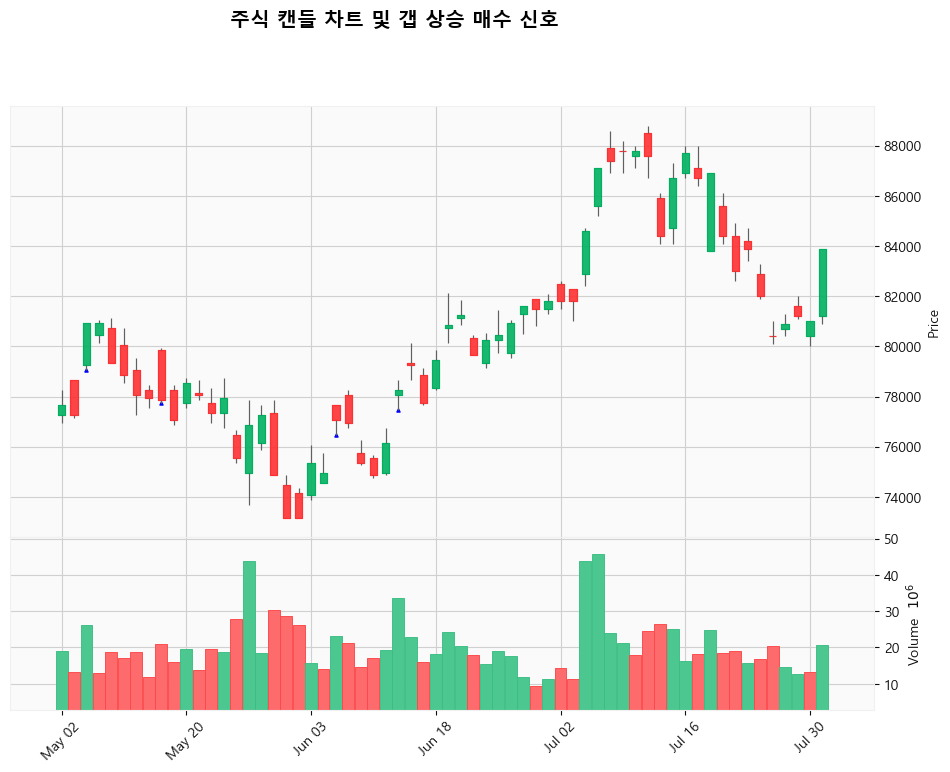

총 4 개의 매수 신호가 발생했습니다.
매수 신호 발생 날짜: 2024-05-07, 시가: 79246.55, 갭 크기: 2.58%
매수 신호 발생 날짜: 2024-05-16, 시가: 79843.88, 갭 크기: 2.43%
매수 신호 발생 날짜: 2024-06-05, 시가: 77653.65, 갭 크기: 3.59%
매수 신호 발생 날짜: 2024-06-13, 시가: 78051.87, 갭 크기: 2.48%


In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 윈도우의 경우
# font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 리눅스의 경우
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

def get_stock_data(ticker, start_date, end_date):
    """
    야후 파이낸스에서 주식 데이터를 가져오는 함수
    """
    stock = yf.Ticker(ticker)
    df = stock.history(start=start_date, end=end_date)
    return df

def identify_gap_up(df, gap_threshold=0.02):
    """
    상승 갭을 식별하는 함수
    :param df: 주식 데이터 DataFrame
    :param gap_threshold: 갭 식별을 위한 임계값 (기본값: 2%)
    :return: 갭 식별 결과가 추가된 DataFrame
    """
    df['prev_close'] = df['Close'].shift(1)
    df['gap'] = (df['Open'] - df['prev_close']) / df['prev_close']
    df['gap_up'] = df['gap'] > gap_threshold
    return df

def generate_buy_signals(df):
    """
    매수 신호를 생성하는 함수
    :param df: 갭 식별 결과가 포함된 DataFrame
    :return: 매수 신호가 추가된 DataFrame
    """
    df['buy_signal'] = df['gap_up']
    return df

def plot_candlestick_chart(df):
    """
    캔들 차트를 그리고 매수 신호를 표시하는 함수
    :param df: 분석 결과가 포함된 DataFrame
    """
    df_plot = df.copy()
    df_plot.index.name = 'Date'
    
    # 매수 신호를 표시하기 위한 마커 생성
    buy_signals = df_plot[df_plot['buy_signal'] == True]
    
    # 모든 날짜에 대해 매수 신호 데이터 생성 (신호가 없는 날은 NaN)
    buy_signal_data = pd.Series(np.where(df_plot['buy_signal'], df_plot['Low'], np.nan), index=df_plot.index)
    
    markers = [
        mpf.make_addplot(buy_signal_data, type='scatter', markersize=5, marker='^', color='blue')
    ]

    # 캔들 차트 스타일 설정
    style = mpf.make_mpf_style(base_mpf_style='yahoo', rc={'font.family': font_name, 'figure.figsize': (12, 8)})

    # 캔들 차트 그리기
    mpf.plot(df_plot, type='candle', style=style, addplot=markers,
             title='주식 캔들 차트 및 갭 상승 매수 신호',
             volume=True, 
             figscale=1.5)

# 메인 실행 코드
if __name__ == "__main__":
    ticker = "005930.KS"  # 삼성전자 주식 코드
    start_date = "2024-05-01"
    end_date = "2024-08-01"
    
    df = get_stock_data(ticker, start_date, end_date)
    df = identify_gap_up(df)
    df = generate_buy_signals(df)
    
    plot_candlestick_chart(df)
    
    # 매수 신호 정보 출력
    buy_signals = df[df['buy_signal'] == True]
    print(f"총 {len(buy_signals)} 개의 매수 신호가 발생했습니다.")
    for date, row in buy_signals.iterrows():
        print(f"매수 신호 발생 날짜: {date.date()}, 시가: {row['Open']:.2f}, 갭 크기: {row['gap']*100:.2f}%")

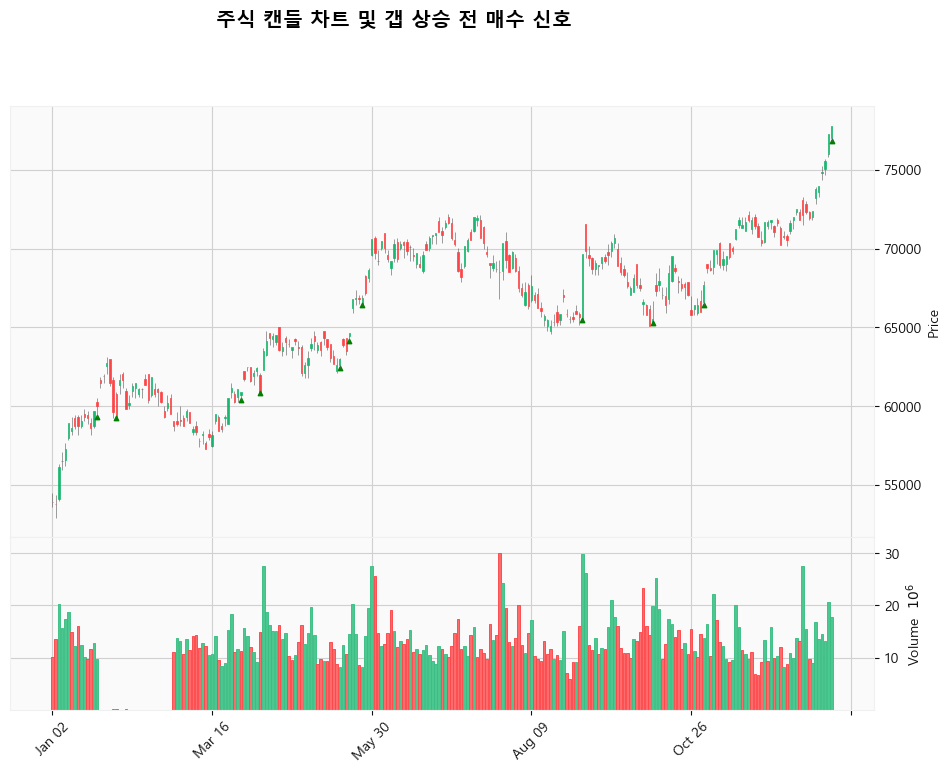

총 10 개의 매수 신호가 발생했습니다.
매수 신호 발생 날짜: 2023-01-20, 종가: 59992.98, 다음 날 갭 크기: 2.75%
매수 신호 발생 날짜: 2023-02-01, 종가: 59216.37, 다음 날 갭 크기: 3.61%
매수 신호 발생 날짜: 2023-03-29, 종가: 60866.66, 다음 날 갭 크기: 2.18%
매수 신호 발생 날짜: 2023-04-06, 종가: 60828.59, 다음 날 갭 크기: 2.41%
매수 신호 발생 날짜: 2023-05-15, 종가: 62976.62, 다음 날 갭 크기: 2.02%
매수 신호 발생 날짜: 2023-05-18, 종가: 64636.47, 다음 날 갭 크기: 2.42%
매수 신호 발생 날짜: 2023-05-24, 종가: 66882.15, 다음 날 갭 크기: 2.04%
매수 신호 발생 날짜: 2023-09-01, 종가: 69669.05, 다음 날 갭 크기: 2.68%
매수 신호 발생 날짜: 2023-10-10, 종가: 65495.98, 다음 날 갭 크기: 3.31%
매수 신호 발생 날짜: 2023-11-01, 종가: 67666.02, 다음 날 갭 크기: 2.04%


In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 윈도우의 경우
# font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 리눅스의 경우
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

def get_stock_data(ticker, start_date, end_date):
    """
    야후 파이낸스에서 주식 데이터를 가져오는 함수
    """
    stock = yf.Ticker(ticker)
    df = stock.history(start=start_date, end=end_date)
    return df

def identify_gap_up(df, gap_threshold=0.02):
    """
    상승 갭을 식별하는 함수
    :param df: 주식 데이터 DataFrame
    :param gap_threshold: 갭 식별을 위한 임계값 (기본값: 2%)
    :return: 갭 식별 결과가 추가된 DataFrame
    """
    df['prev_close'] = df['Close'].shift(1)
    df['gap'] = (df['Open'] - df['prev_close']) / df['prev_close']
    df['gap_up'] = df['gap'] > gap_threshold
    return df

def generate_buy_signals(df):
    """
    갭 상승 전 거래일의 종가에 매수 신호를 생성하는 함수
    :param df: 갭 식별 결과가 포함된 DataFrame
    :return: 매수 신호가 추가된 DataFrame
    """
    df['buy_signal'] = df['gap_up'].shift(-1)  # 다음 날 갭 상승이 있으면 오늘 매수 신호
    return df

def plot_candlestick_chart(df):
    """
    캔들 차트를 그리고 매수 신호를 표시하는 함수
    :param df: 분석 결과가 포함된 DataFrame
    """
    df_plot = df.copy()
    df_plot.index.name = 'Date'
    
    # 매수 신호를 표시하기 위한 마커 생성
    buy_signals = df_plot[df_plot['buy_signal'] == True]
    
    # 모든 날짜에 대해 매수 신호 데이터 생성 (신호가 없는 날은 NaN)
    buy_signal_data = pd.Series(np.where(df_plot['buy_signal'], df_plot['Low'], np.nan), index=df_plot.index)
    
    markers = [
        mpf.make_addplot(buy_signal_data, type='scatter', markersize=10, marker='^', color='g')
    ]

    # 캔들 차트 스타일 설정
    style = mpf.make_mpf_style(base_mpf_style='yahoo', rc={'font.family': font_name, 'figure.figsize': (12, 8)})

    # 캔들 차트 그리기
    mpf.plot(df_plot, type='candle', style=style, addplot=markers,
             title='주식 캔들 차트 및 갭 상승 전 매수 신호',
             volume=True, 
             figscale=1.5)

# 메인 실행 코드
if __name__ == "__main__":
    ticker = "005930.KS"  # 삼성전자 주식 코드
    start_date = "2023-01-01"
    end_date = "2024-01-01"
    
    df = get_stock_data(ticker, start_date, end_date)
    df = identify_gap_up(df)
    df = generate_buy_signals(df)
    
    plot_candlestick_chart(df)
    
    # 매수 신호 정보 출력
    buy_signals = df[df['buy_signal'] == True]
    print(f"총 {len(buy_signals)} 개의 매수 신호가 발생했습니다.")
    for date, row in buy_signals.iterrows():
        next_day = df.index[df.index.get_loc(date) + 1]
        print(f"매수 신호 발생 날짜: {date.date()}, 종가: {row['Close']:.2f}, 다음 날 갭 크기: {df.loc[next_day, 'gap']*100:.2f}%")

In [12]:
df.to_csv('gap.csv')